# First attempt at a Random Forest for Housing Prices comp

## Imports

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [5]:
PATH = "data/house-prices/"

In [6]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False)

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [7]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [8]:
display_all(df_raw.T)

0        1        2        3        4        5        6     \
Id                   1        2        3        4        5        6        7   
MSSubClass          60       20       60       70       60       50       20   
MSZoning            RL       RL       RL       RL       RL       RL       RL   
LotFrontage         65       80       68       60       84       85       75   
LotArea           8450     9600    11250     9550    14260    14115    10084   
Street            Pave     Pave     Pave     Pave     Pave     Pave     Pave   
Alley              NaN      NaN      NaN      NaN      NaN      NaN      NaN   
LotShape           Reg      Reg      IR1      IR1      IR1      IR1      Reg   
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl      Lvl      Lvl   
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   AllPub   
LotConfig       Inside      FR2   Inside   Corner      FR2   Inside   Inside   
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl      Gtl      Gtl   
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge  Mitchel  Somerst   
Condition1        Norm    Feedr     Norm     Norm     Norm     Norm     Norm   
Condition2        Norm     Norm     Norm     Norm     Norm     Norm     Norm   
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam     1Fam     1Fam   
HouseStyle      2Story   1Story   2Story   2Story   2Story   1.5Fin   1Story   
OverallQual          7        6        7        7        8        5        8   
OverallCond          5        8        5        5        5        5        5   
YearBuilt         2003     1976     2001     1915     2000     1993     2004   
YearRemodAdd      2003     1976     2002     1970     2000     1995     2005   
RoofStyle        Gable    Gable    Gable    Gable    Gable    Gable    Gable   
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg  CompShg  CompShg   
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd  VinylSd  VinylSd   
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd  VinylSd  VinylSd   
MasVnrType     BrkFace     None  BrkFace     None  BrkFace     None    Stone   
MasVnrArea         196        0      162        0      350        0      186   
ExterQual           Gd       TA       Gd       TA       Gd       TA       Gd   
ExterCond           TA       TA       TA       TA       TA       TA       TA   
Foundation       PConc   CBlock    PConc   BrkTil    PConc     Wood    PConc   
BsmtQual            Gd       Gd       Gd       TA       Gd       Gd       Ex   
BsmtCond            TA       TA       TA       Gd       TA       TA       TA   
BsmtExposure        No       Gd       Mn       No       Av       No       Av   
BsmtFinType1       GLQ      ALQ      GLQ      ALQ      GLQ      GLQ      GLQ   
BsmtFinSF1         706      978      486      216      655      732     1369   
BsmtFinType2       Unf      Unf      Unf      Unf      Unf      Unf      Unf   
BsmtFinSF2           0        0        0        0        0        0        0   
BsmtUnfSF          150      284      434      540      490       64      317   
TotalBsmtSF        856     1262      920      756     1145      796     1686   
Heating           GasA     GasA     GasA     GasA     GasA     GasA     GasA   
HeatingQC           Ex       Ex       Ex       Gd       Ex       Ex       Ex   
CentralAir           Y        Y        Y        Y        Y        Y        Y   
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr    SBrkr    SBrkr   
1stFlrSF           856     1262      920      961     1145      796     1694   
2ndFlrSF           854        0      866      756     1053      566        0   
LowQualFinSF         0        0        0        0        0        0        0   
GrLivArea         1710     1262     1786     1717     2198     1362     1694   
BsmtFullBath         1        0        1        1        1        1        1   
BsmtHalfBath         0        1        0        0        0        0        0   
FullBath          

In [9]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [8]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

## Initial Processing

Before we can pass the dataset to the random forest we need to deal with two issues: 
1. Get rid of missing values 
2. Transform strings into something the forest can recognize (ints)

In [9]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/house-prices-raw')

For point 2. the categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [13]:
df_raw.LotConfig.dtype

dtype('O')

In [10]:
train_cats(df_raw)

Before we used `train_cats`, we can see that the feature `LotConfig` was treated as a pandas Object ('O'). This is pandas most general datatype, and hence is slow and not useful. We can turn each of the strings into a `CategoricalDtype` with specific categories to make the data faster to access and ready to be turned into an `int`.

In [15]:
df_raw.LotConfig.dtype

CategoricalDtype(categories=['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], ordered=True)

By using the prod_df function from the fastai lib, we'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

 **ASSUMPTION #1** Might need to return here and make sure all catgorical features have correct 'order' (i.e. would want high>medium>low). First run through doesn't look as though there are any clear orders but this might change

In [11]:
df, y, nas = proc_df(df_raw, 'SalePrice')

**ASSUMPTION #2** It looks like both the training and test set have 1460 entries. Hence we won't be able to have a validation set that is exactly like our test set in form. Let's try just spliting them in half for the time being. 

In [12]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 730
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((730, 83), (730,), (730, 83))

## Random Forests

### Base Model

In [46]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)
    return res

In [14]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 112 ms, sys: 0 ns, total: 112 ms
Wall time: 122 ms
[0.0674886561883825, 0.16050651187668158, 0.9737271770878262, 0.8229040152934082]


An r^2 in the low-80's is ok (and the RMSLE puts us around rank 2900 of 3999 on the Kaggle leaderboard, better than the sample submission rank of 3788), but we can see from the validation set score that we're over-fitting badly. Let's look into how many trees our forest REALLY needs.

## Bagging

We'll grab the predictions for each individual tree, and look at one example.

In [15]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([12.87902, 12.47801, 12.52431, 12.40738, 12.36734, 12.87902, 12.52416, 12.47801, 12.79918, 12.52453]),
 12.58609401697524,
 12.373703486914124)

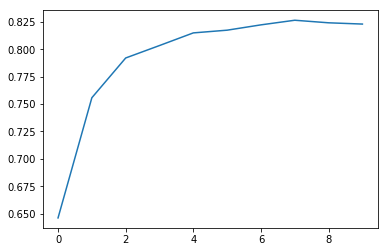

In [51]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

Looks like our predictions level out after 7 trees. Let's double check:

In [52]:
mean1 = np.array([])
for j in [40,60]:
    for i in range(10):
        m = RandomForestRegressor(n_estimators = j, n_jobs=-1)
        m.fit(X_train, y_train) 
        _,_,_,x = print_score(m)
        mean1 = np.append(mean1,x)
    print(j, np.mean(mean1))

[0.06078329813378017, 0.14808315902614078, 0.9786885156246768, 0.8492578371922459]
[0.06213490549850165, 0.14589252607586442, 0.9777301925807435, 0.8536847852664445]
[0.06302084391573325, 0.14706985539698428, 0.977090605744397, 0.8513137761791155]
[0.06027380459364819, 0.14954243569422046, 0.9790442895658233, 0.8462722392965614]
[0.06082009789933832, 0.1486788260223704, 0.9786627027761602, 0.8480426723200848]
[0.061113176306752955, 0.14622019787877566, 0.9784565680143026, 0.8530268048826786]
[0.06047037052529823, 0.1465435860715457, 0.9789073844694971, 0.8523759788560876]
[0.06185057620139629, 0.1468201766952419, 0.9779335395117341, 0.8518181932254656]
[0.06091708696853102, 0.14452055879267559, 0.9785945958588975, 0.8564237304223032]
[0.06177429029468868, 0.14959291137501463, 0.9779879390639937, 0.8461684450405316]
40 0.850838446268152
[0.060685356810043035, 0.14571348958363445, 0.9787571395204159, 0.8540436753349449]
[0.05897937860285067, 0.1449348853358894, 0.9799347043906005, 0.8555

Turns out 40 trees is a touch better and 60 trees doesn't really add much. So let's go with 40 trees.

In [53]:
m = RandomForestRegressor(n_estimators = 40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.059744300976425024, 0.1448840502664744, 0.9794108629051286, 0.8557005892769667]


[0.059744300976425024,
 0.1448840502664744,
 0.9794108629051286,
 0.8557005892769667]

## Out-of-bag (OOB) Score

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [54]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.06338487870078498, 0.14699885287917344, 0.9768251728168189, 0.8514573072629579, 0.8463285582096834]


[0.06338487870078498,
 0.14699885287917344,
 0.9768251728168189,
 0.8514573072629579,
 0.8463285582096834]

Since our OOB score is similar to the validation set score, we can see that we are indeed overfititng our model.

## Reducing over-fitting

### Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*. The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [57]:
set_rf_samples(550)

In [58]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0761398583191239, 0.1478502137216824, 0.9665597661502742, 0.8497317203846535, 0.8462671636950128]


[0.0761398583191239,
 0.1478502137216824,
 0.9665597661502742,
 0.8497317203846535,
 0.8462671636950128]

This doesn't seem to help as much as it did in  the fastai ML1 course, and this is likely due to the fact that we have such a small amount of data in this competition compared to the Bulldozer one (1460 vs 400k). Let's reset the samples and try limiting the minimum size of each leaf.

In [60]:
reset_rf_samples()

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [63]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf = 2, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07165163355765716, 0.1457630727605496, 0.970385979720592, 0.853944326817759, 0.8486229872011994]


[0.07165163355765716,
 0.1457630727605496,
 0.970385979720592,
 0.853944326817759,
 0.8486229872011994]

In [67]:
mean1 = np.array([])
for j in [2,3,5,10]:
    for i in range(10):
        m = RandomForestRegressor(n_estimators = 40, min_samples_leaf = j,n_jobs=-1, oob_score=True)
        m.fit(X_train, y_train) 
        _,_,_,x,_ = print_score(m)
        mean1 = np.append(mean1,x)
    print(j, np.mean(mean1))

[0.07643867126338157, 0.15028797691881882, 0.9662967768926763, 0.8447356042073116, 0.8451319891529633]
[0.07423679207323304, 0.1500757796764915, 0.968210509249015, 0.8451737419475143, 0.8410564955891954]
[0.07125352275831892, 0.1476433983002825, 0.9707141483287273, 0.8501518220633878, 0.8430375862646077]
[0.07420392994013983, 0.14950225985430468, 0.9682386472982653, 0.8463548287266397, 0.8468855838506207]
[0.07562331991287108, 0.14496726987319872, 0.9670119491268498, 0.8555347740755376, 0.8459573023078613]
[0.071687640554977, 0.14751991486140112, 0.9703562084558764, 0.85040237211308, 0.8443676581846999]
[0.07216587539251824, 0.1481732413128234, 0.9699593762896418, 0.8490743817732884, 0.846756364986289]
[0.07108951766326037, 0.14814583199605705, 0.9708488083737794, 0.8491302135203511, 0.8412377611899386]
[0.0727516181963191, 0.14729525422351622, 0.9694697407275275, 0.8508576748009058, 0.8490842246999957]
[0.07386934453913648, 0.1486589294666671, 0.9685244253328013, 0.8480833401840226, 0

Looks like we start to lose information after cutting off at 3, so lets stick with that.

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

In [65]:
mean1 = np.array([])
for j in [None,0.5,'log2','sqrt']:
    for i in range(10):
        m = RandomForestRegressor(n_estimators = 40, min_samples_leaf = 3, max_features = j,n_jobs=-1,oob_score=True)
        m.fit(X_train, y_train) 
        _,_,_,x,_ = print_score(m)
        mean1 = np.append(mean1,x)
    print(j, np.mean(mean1))

[0.08629596205331087, 0.14673354463634367, 0.9570437732052489, 0.8519930126262112]
[0.08526393739403948, 0.14931101276600306, 0.9580650678029383, 0.8467476709106188]
[0.08536557715712673, 0.1482144128894658, 0.9579650302691914, 0.8489904974106866]
[0.08540786380060128, 0.14467121012964865, 0.9579233751174834, 0.8561242404270206]
[0.08474377140447349, 0.14832322063672573, 0.9585751682973778, 0.8487686966469464]
[0.08342298736843955, 0.1464327718833762, 0.9598563689226445, 0.8525991568379488]
[0.08414412145782846, 0.14776669366836437, 0.9591593413153787, 0.8499014444529198]
[0.08292075848254406, 0.1445954250021376, 0.9603382649453241, 0.8562749378169432]
[0.08435782404655212, 0.14715693412853, 0.9589516301321095, 0.8511376525165848]
[0.0842426810018441, 0.145163164780802, 0.9590636104658777, 0.8551440772918071]
None 0.8517681386937689
[0.08663876990493713, 0.14271045847972663, 0.9567018109578527, 0.8599977537335022]
[0.08580602113182943, 0.14073902742073532, 0.957530152150599, 0.86383907

Looks like 0.5 works the best so lets go with that.

That's all there is to notebook #1 from the ML1 course. We're now at 2320 on the leaderboard, almost in the top 50%! But it looks like we're still heavily overfitting our training data. One bit might be trying to vary the validation set size. Let's try that before we move on to interpreting our results.

In [117]:
n_valid = 1
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1459, 83), (1459,), (1, 83))

In [118]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf = 3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07836851268932105, 0.02672034952550817, 0.9615069525119146, 0.0, 0.8719304610791863]


[0.07836851268932105,
 0.02672034952550817,
 0.9615069525119146,
 0.0,
 0.8719304610791863]

Since this is such a small dataset, we might just want to use the OOB score moving forward as including all of the data in the training set does push our OOB score up to 87.2%! But it seems like a 50/50 split with the train and valid still might be the way to go. Don't see much improvement between using half the dataset for training and the whole dataset. Let's move forward with some more exploratory data analysis (EDA) and interpreting what our ramdom forest is producing.

## Feature Importance

In [88]:
??rf_feat_importance

In [87]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
17,OverallQual,0.368787
46,GrLivArea,0.157587
19,YearBuilt,0.071442
62,GarageArea,0.043432
38,TotalBsmtSF,0.041441
61,GarageCars,0.037355
43,1stFlrSF,0.029089
27,ExterQual,0.024814
20,YearRemodAdd,0.019673
49,FullBath,0.015176


Ok so rather unexpectedly, the most important feature is the Overall Quality of the House.

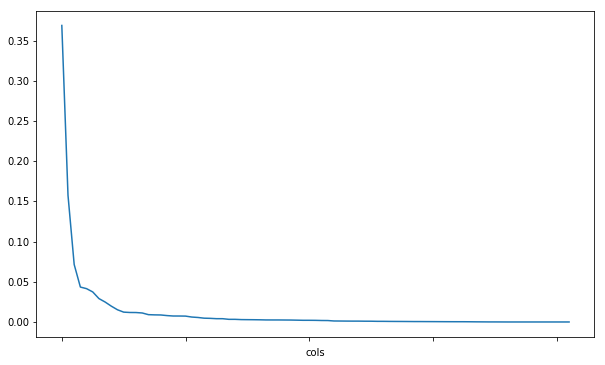

In [83]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [85]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

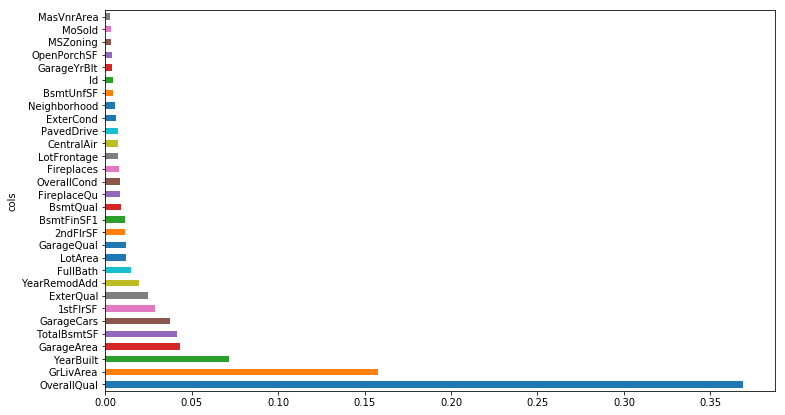

In [86]:
plot_fi(fi[:30]);

Let's remove the unimportant features of our data and see if that helps things.

In [96]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

23

In [125]:
df_keep = df[to_keep].copy()
n_trn = len(df)-730
X_train, X_valid = split_vals(df_keep, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [126]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09188471011366682, 0.1413076968995768, 0.9512996955548244, 0.8627365098853159, 0.8535087492166215]


[0.09188471011366682,
 0.1413076968995768,
 0.9512996955548244,
 0.8627365098853159,
 0.8535087492166215]

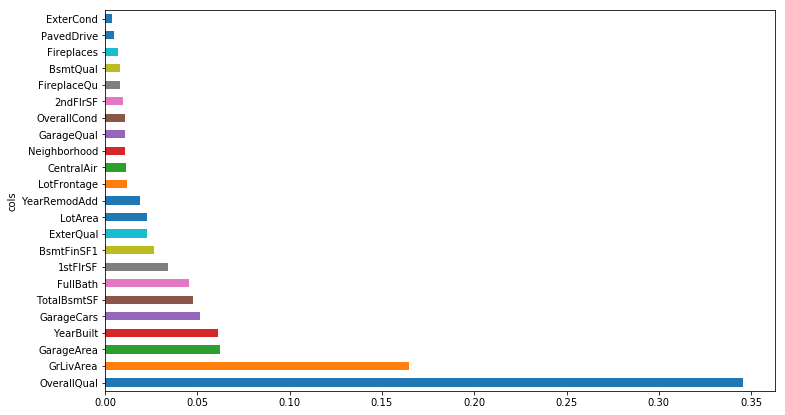

In [127]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In the above plot we see the benefit of removing all the unimportant features. Now that the model is unburdened by a bunch of useless information, we see that `OverallQual` is not the sole predictor and `GrLivArea` and `YearBuilt` now have more importance. 

## One-hot encoding

proc_df's optional *max_n_cat* argument will turn some categorical variables into new columns.

For example, the column **ProductSize** which has 6 categories:

* Large
* Large / Medium
* Medium
* Compact
* Small
* Mini

gets turned into 6 new columns:

* ProductSize_Large
* ProductSize_Large / Medium
* ProductSize_Medium
* ProductSize_Compact
* ProductSize_Small
* ProductSize_Mini

and the column **ProductSize** gets removed.

It will only happen to columns whose number of categories is no bigger than the value of the *max_n_cat* argument.

Now some of these new columns may prove to have more important features than in the earlier situation, where all categories were in one column.

In [128]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0859814761927915, 0.14069270215806245, 0.9573562909678486, 0.863928697281836, 0.8522669428762991]


[0.0859814761927915,
 0.14069270215806245,
 0.9573562909678486,
 0.863928697281836,
 0.8522669428762991]

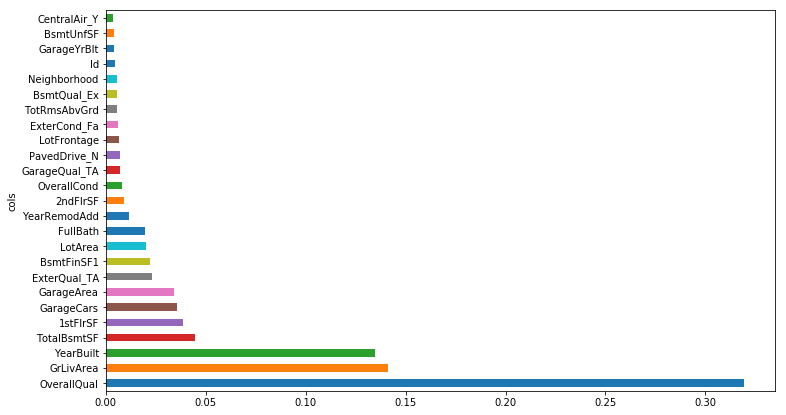

In [129]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

So by using one-hot encoding we see a few new features at the top of the list and the ordering has changed slightly. `GarageArea` is no longer the 4th in terms of importance and we see new features like `ExterQual_TA`.

In [130]:
to_keep2 = fi[fi.imp>0.005].cols; len(to_keep2)

21

In [131]:
df_keep2 = df_trn2[to_keep2].copy()
X_train, X_valid = split_vals(df_keep2, n_trn)
m2 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m2.fit(X_train, y_train)
print_score(m2)

[0.0938703445714799, 0.1438797537306933, 0.9491721193799708, 0.8576941438091522, 0.8501963075099843]


[0.0938703445714799,
 0.1438797537306933,
 0.9491721193799708,
 0.8576941438091522,
 0.8501963075099843]

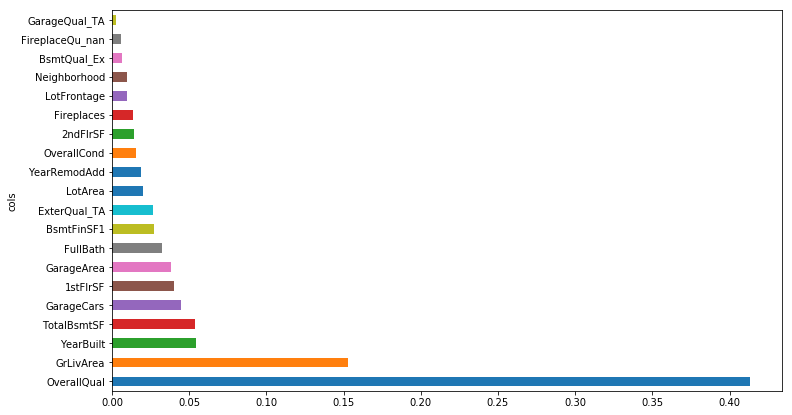

In [123]:
fi2 = rf_feat_importance(m2, df_keep2)
plot_fi(fi2[:20]);

Not clear whether our trimmed one-hot encoding model is better than just the regular trimmed model but they at least have different orderings of the features. Will be useful to continue to test both versions until a winner really sticks out.

## Removing Redundant features

One thing that makes this harder to interpret is if there are some variables with very similar meanings. Let's try to remove redundent features.

In [109]:
from scipy.cluster import hierarchy as hc

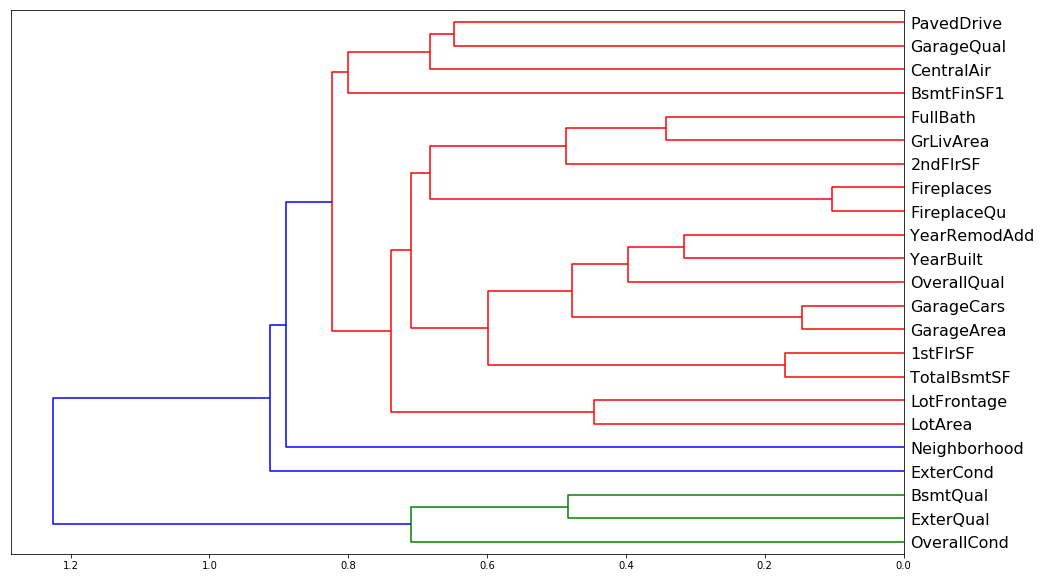

In [110]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

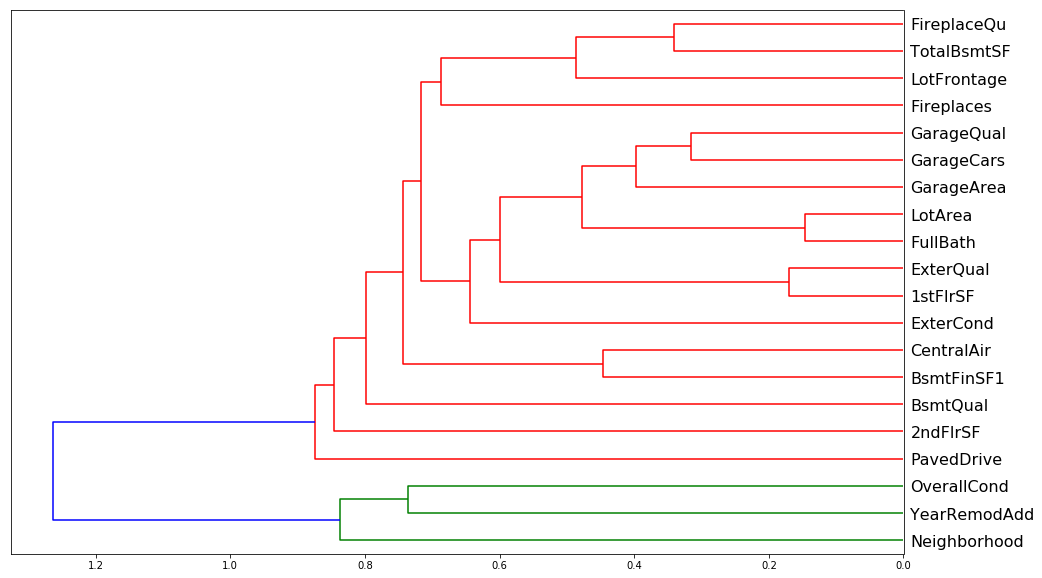

In [124]:
corr = np.round(scipy.stats.spearmanr(df_keep2).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Doesn't look like there's musch redundancy in the features of either one, though one worrisome aspect of both is the big blue split that occurs in both. There seems to be two major groupings in both sets of data which leads me to believe that some of these features are inextricably linked. Intuitively this would make sense, e.g. `GarageArea` and `GarageCars` must explain the same sort of aspect of the data, namely how big the garage is.

## Confidence based on tree variance

We saw how the model averages predictions across the trees to get an estimate - but how can we know the confidence of the estimate? One simple way is to use the standard deviation of predictions, instead of just the mean. This tells us the *relative* confidence of predictions - that is, for rows where the trees give very different results, you would want to be more cautious of using those results, compared to cases where they are more consistent. Using the same example as in the last lesson when we looked at bagging:

In [79]:
def get_preds(t): return t.predict(X_valid)
preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

(12.549632153280209, 0.13051293060851235)

In [80]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)

23

[0.09274332497334009, 0.14145036183711915, 0.9503852850108832, 0.8624592061989342, 0.8507419459435522]


[0.09274332497334009,
 0.14145036183711915,
 0.9503852850108832,
 0.8624592061989342,
 0.8507419459435522]